<a href="https://colab.research.google.com/github/Zahra-ah/corona_virus_classification_cnn_model/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from keras.layers import*
from tensorflow.keras.models import Sequential # Explicitly import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub
path = kagglehub.dataset_download("georgesaavedra/covid19-dataset")

100%|██████████| 9.09M/9.09M [00:00<00:00, 185MB/s]

Extracting files...


In [ ]:
import kagglehub
path = kagglehub.dataset_download("pranavraikokte/covid19-image-dataset")

100%|██████████| 158M/158M [00:00<00:00, 171MB/s]

Extracting files...


In [ ]:
#read dataset
dir=os.listdir(path)
dir
base_dir = os.path.join(path,'Covid19-dataset')
os.listdir(base_dir)



['train', 'test']

In [ ]:
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, 'test')

#image classes
image_classes=os.listdir(train_path)
image_classes

['Viral Pneumonia', 'Normal', 'Covid']

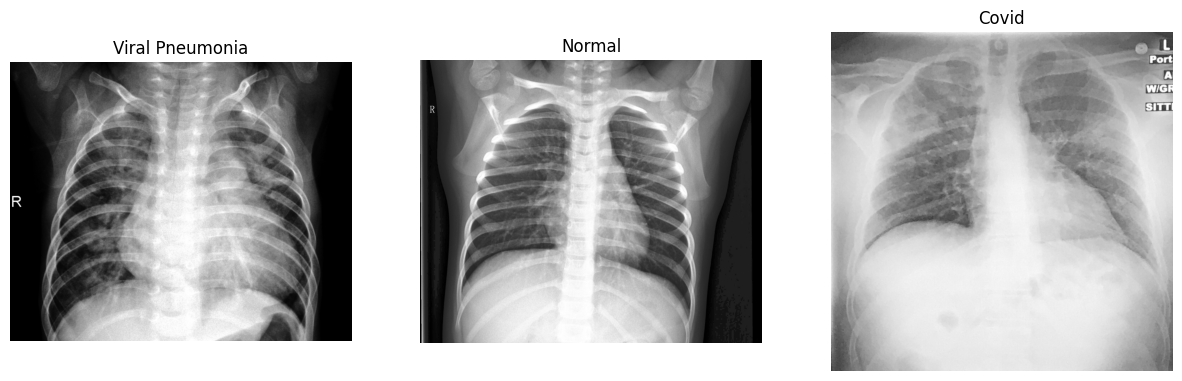

In [ ]:
def plot_image(image_classes):
  plt.figure(figsize=(15,15))
  for i,category in enumerate(image_classes):
    image_path=train_path + "/"+ category
    images_in_folder=os.listdir(image_path)

    first=images_in_folder[0]
    first_image_path=image_path + "/" +first

    img=image.load_img(first_image_path)
    img_array=image.img_to_array(img)/255

    plt.subplot(1,3,i+1)
    plt.imshow(img_array)
    plt.title(category)
    plt.axis("off")
  plt.show()
plot_image(image_classes)

In [ ]:
#steps for CNN
#image preprocessing
#modeling
#compile
#fit
#visualize
#save


In [ ]:
#image preprocessing
data_gen=ImageDataGenerator(rescale=1/2)

In [ ]:
#train data generator
train_data=data_gen.flow_from_directory(train_path,batch_size=32,target_size=(224,224))

Found 251 images belonging to 3 classes.


In [ ]:
from IPython.testing import test
#test data generator
test_data=data_gen.flow_from_directory(test_path,batch_size=32,target_size=(224,224))

Found 66 images belonging to 3 classes.


In [ ]:
model=Sequential()
#add convolutional layer
#add pooling layer
model.add(Conv2D(32,(3,3),activation=tf.keras.layers.LeakyReLU(),input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation=tf.keras.layers.LeakyReLU()))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),activation=tf.keras.layers.LeakyReLU()))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),activation=tf.keras.layers.LeakyReLU()))
model.add(MaxPooling2D())

#add flatten layer-----> convert data to 1D
model.add(Flatten())
#add fully connected layers

model.add(Dense(128,activation=tf.keras.layers.LeakyReLU()))
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU()))

#add output layer
model.add(Dense(3,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,571,043 (9.81 MB)

 Trainable params: 2,571,043 (9.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
#fit model
model_history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.9906 - loss: 0.0915 - val_accuracy: 0.8636 - val_loss: 0.3001
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9540 - loss: 0.1114 - val_accuracy: 0.8939 - val_loss: 0.2424
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9863 - loss: 0.0404 - val_accuracy: 0.9091 - val_loss: 0.2312
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.9840 - loss: 0.0613 - val_accuracy: 0.8939 - val_loss: 0.2031
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9960 - loss: 0.0387 - val_accuracy: 0.8636 - val_loss: 0.2592
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9977 - loss: 0.0390 - val_accuracy: 0.9242 - val_loss: 0.1763
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.8939 - val_loss: 0.2119
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.9926 - loss: 0.0376 - val_accuracy: 0.8788 - val_loss: 0.2415
Epoch 9/

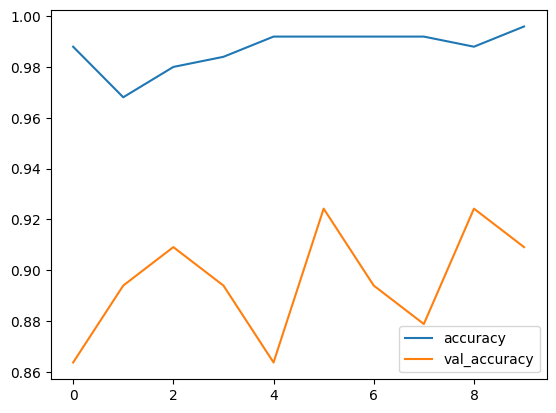

In [ ]:
plt.plot(model_history.history["accuracy"],label="accuracy")
plt.plot(model_history.history["val_accuracy"],label="val_accuracy")
plt.legend()

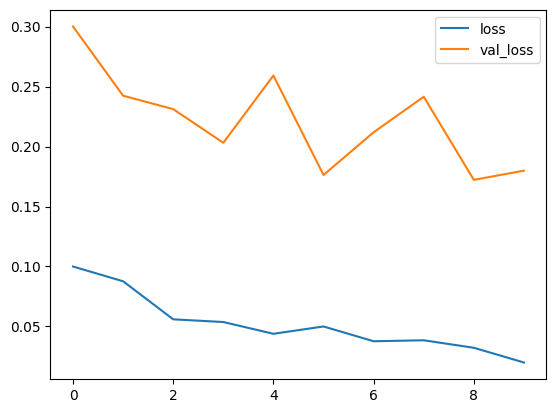

In [ ]:
plt.plot(model_history.history['loss'],label="loss")
plt.plot(model_history.history['val_loss'],label="val_loss")
plt.legend()

In [ ]:
model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.9116 - loss: 0.1854


[0.17988702654838562, 0.9090909361839294]

In [ ]:
model.evaluate(train_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9991 - loss: 0.0145


[0.020169701427221298, 0.9960159659385681]

In [ ]:
model.save("covid_model.keras")

In [ ]:
class_map=dict([value,key] for key ,value in train_data.class_indices.items())



In [ ]:
class_map=dict([value,key] for key ,value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


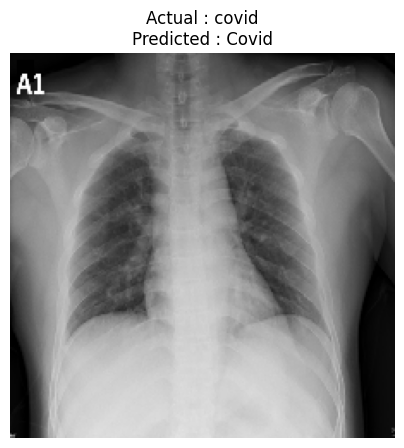

In [ ]:
import numpy as np
def prediction(test_image,actual_label):
  #load & preprocessing image
  test_image=image.load_img(test_image,target_size=(224,224))
  test_image_array=image.img_to_array(test_image)/255
  test_image_input=test_image_array.reshape(1,224,224,3)

  #make prediction
  predicted_class=np.argmax(model.predict(test_image_input))
  predicted_img=class_map[predicted_class]

  plt.figure(figsize=(5,5))
  plt.imshow(test_image)
  plt.title(f"Actual : {actual_label}\nPredicted : {predicted_img}")
  plt.grid()
  plt.axis("off")
test_image="/content/0105.png"
prediction(test_image,actual_label="covid")